# Predicting Car Prices with K-Nearest Neighbors

## Introduction
In this project we are tasked with creating a car price prediction model using a 1985 dataset of vehicle sales which includes prices sold, vehicle characteristics, insurance ratings, and vehicle risk rating. We will use the k-nearest neighbors algorithm to predict prices based on the characteristic data available. The dataset is available for download at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

In [2]:
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
           'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
           'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
           'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm',
           'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv("imports-85.data", names = columns)
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars['normalized_losses'].value_counts().head()

?      41
161    11
91      8
150     7
104     6
Name: normalized_losses, dtype: int64

In [4]:
cars['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

There are 205 rows and 26 columns of integer, string, and float values. At first glance, there appears to be no null values in the dataset, however, looking at the `normalized_losses` column, we can see that there are unexpected datapoints '?'. We know from the description of our data at the UCI Machine Learning Repository website that this column of data should only be integers between 65 and 256. Further, there are other columns, such as `bore`, `stroke`, and `price` that are in string object format when these ought to be in integer or float formats. It is expected that '?' values are acting as nulls and these columns should have those replaced and the column changed to their proper format. The `num_of_cylinders` and `num_of_doors` column will also need their string representation of integers replaced with integers. 

### Identifying Relevant Columns
Our task is to create a k-nearest neighbors algorithm that will predict the price of new cars. Our target column will therefore be the `price` column and we will use the numeric columns: `symboling`, `normalized_losses`, `num_of_doors`, `wheel_base`, `length`, `width`, `height`, `curb_weight`, `engine_size`, `bore`, `stroke`,`compression_rate`, `horsepower`, `peak_rpm`, `city_mpg`, and `highway_mpg` to train our algorithm.



## Data Clean-up
Let's now replace all the '?' values that we identified earlier with np.nan values and convert our columns to their proper format. 
### Replacing ? Values

In [5]:
cars = cars.replace('?', np.nan)

In [6]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Changing String Numbers to Numeric
The `num_of_doors` column and the `num_of_cylinders` columns are string version of words. Let's map those values to integers so our algorithm may use them.

In [7]:
cars['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [8]:
cars['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [9]:
num_map = {'two': 2, 'three': 3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}

cars['num_of_doors'] = cars['num_of_doors'].map(num_map)
cars['num_of_cylinders'] = cars['num_of_cylinders'].map(num_map)

In [10]:
print(cars['num_of_doors'].value_counts(dropna=False))
print(cars['num_of_cylinders'].value_counts(dropna=False))

4.0    114
2.0     89
NaN      2
Name: num_of_doors, dtype: int64
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num_of_cylinders, dtype: int64


### Converting Columns to Float Types
Now that we've removed string values from numeric columns, we can convert the remaining columns to their appropriate integer or float values. 

In [11]:
cars[['normalized_losses','num_of_doors','bore','stroke','horsepower','peak_rpm','price']] = cars[['normalized_losses','num_of_doors','bore','stroke','horsepower','peak_rpm','price']].astype(float)

In [12]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    float64
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

### Imputation
The `normalized_losses` column has a high count of missing values. We will opt to impute this data with the average of the column's values. This decision was chosen in favor of dropping the column entirely because once we begin training our models, we will know which columns effectively make our algorithm more accurate and drop those that do not. The implication being, if this imputation makes our algorithm less accurate it will be dropped anyways. 

There are other columns with a low count of missing values. We will make a decision on whether to keep these rows on further investigation.

In [14]:
cars['normalized_losses'] = cars['normalized_losses'].fillna(cars['normalized_losses'].mean())

In [15]:
cars.describe().iloc[:1,:]

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.0,205.0,203.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,201.0,201.0,205.0,203.0,203.0,205.0,205.0,201.0


In [16]:
cars_drop = cars.dropna().copy()

In [17]:
cars_drop.describe().iloc[:1,:]

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0


Twelve rows of data are removed if we remove rows with an NA value. We will accept this loss for now and revisit imputation if our algorithm has trouble accurately predicting prices.

## Numeric Column Normalization
K-Nearest Neighbors considers the Euclidean distance between points. Because non-normalized values will have far greater variance when comparing values of different scales, we will normalize our numeric columns.

In [18]:
cars_drop.describe()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,121.284974,3.160622,98.923834,174.326425,65.893782,53.869948,2561.507772,4.419689,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,32.342674,0.989583,6.152409,12.478593,2.137795,2.394770,526.700026,1.023182,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,4.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,4.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


The above contains contains all of our numeric data, we will normalize all of these columns except `price` which is our target.

In [19]:
normal_targets = list(cars_drop.describe().columns)[:-1] # we remove price at the end

In [20]:
normal_targets

['symboling',
 'normalized_losses',
 'num_of_doors',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'num_of_cylinders',
 'engine_size',
 'bore',
 'stroke',
 'compression_rate',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [21]:
normalized_cars = pd.DataFrame()
# z-score normalization
for target in normal_targets:
    series = cars_drop[target]
    transform_1 = series - series.mean()
    transform_2 = transform_1 / transform_1.std()
    normalized_cars[target] = transform_2

# add price column 
normalized_cars['price'] = cars_drop['price']
    
normalized_cars.describe()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,193.000000
mean,2.531078e-17,-7.938382e-17,-2.761176e-16,-2.312485e-15,-2.650729e-15,1.308568e-14,-2.608276e-14,-1.553162e-16,3.100571e-16,3.077561e-17,1.463424e-15,2.094093e-14,1.166309e-16,9.146397e-17,5.390046e-16,-1.806270e-16,1.213767e-16,13285.025907
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8089.082886
min,-2.264462e+00,-1.740270e+00,-1.172839e+00,-2.003091e+00,-2.662674e+00,-2.616613e+00,-2.534668e+00,-2.038177e+00,-1.387523e+00,-1.613937e+00,-2.902594e+00,-3.737419e+00,-7.903543e-01,-1.461583e+00,-2.026354e+00,-1.929674e+00,-2.169247e+00,5118.000000
25%,-6.457909e-01,-8.127026e-01,-1.172839e+00,-7.190410e-01,-6.432155e-01,-8.390804e-01,-7.808465e-01,-7.907875e-01,-4.101802e-01,-7.243093e-01,-6.631130e-01,-4.402374e-01,-4.132321e-01,-8.820277e-01,-6.395232e-01,-9.903874e-01,-8.490012e-01,7738.000000
50%,1.635444e-01,2.210782e-02,8.482140e-01,-3.126961e-01,-9.026858e-02,-2.309774e-01,9.606424e-02,-2.800603e-01,-4.101802e-01,-1.953418e-01,-7.570826e-02,1.304286e-01,-2.875247e-01,-2.234416e-01,5.527426e-04,-5.110107e-02,-1.155311e-01,10245.000000
75%,9.728798e-01,3.931347e-01,8.482140e-01,5.650089e-01,8.232959e-01,4.706800e-01,7.641867e-01,7.413940e-01,-4.101802e-01,4.298017e-01,9.522501e-01,5.108726e-01,-1.869588e-01,3.297708e-01,8.539874e-01,7.316376e-01,4.712451e-01,16515.000000
max,1.782215e+00,4.165241e+00,8.482140e-01,3.571961e+00,2.706521e+00,2.856315e+00,2.476251e+00,2.856450e+00,7.408563e+00,4.757718e+00,2.237198e+00,2.920351e+00,3.232282e+00,4.175914e+00,3.200933e+00,3.706044e+00,3.405126e+00,45400.000000


## K-Nearest Neighbor Models
### Univariate Model
Let's begin with a simple model that takes into account only one variable at a time. 

In [22]:
# randomize the dataset
np.random.seed(1)
cars_rand = normalized_cars.loc[np.random.permutation(cars_drop.index)]
cars_rand.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
48,-0.645791,0.022108,0.848214,2.287911,2.025355,1.733663,-0.446785,2.856450,1.544506,3.122727,1.099101,2.920351,-0.513798,1.910378,-0.746203,-1.616578,-1.729165,35550.0
78,0.972880,1.227945,-1.172839,-0.849071,-1.364451,-0.698749,-1.281938,-1.058492,-0.410180,-0.868573,-1.323943,-0.059793,-0.186959,-0.934715,0.853987,0.888185,1.058021,6669.0
174,-1.455126,-1.740270,0.848214,0.565009,0.102061,0.283571,0.430125,-0.154752,-0.410180,-0.435782,-0.222559,0.320651,3.106575,-0.802997,-1.279599,0.731638,0.324551,10698.0
37,-0.645791,-0.472595,-1.172839,-0.393965,-0.547051,-0.324532,-0.237997,-0.618014,-0.410180,-0.435782,-0.663113,1.049835,-0.287525,-0.460533,1.494063,0.261994,0.324551,7895.0
195,-1.455126,-1.462000,0.848214,0.873831,1.159872,0.611011,1.515825,0.897080,-0.410180,0.309582,1.649793,-0.313423,-0.161817,0.277084,0.640629,-0.364197,-0.408919,13415.0


In [23]:
def knn_train_test(train_col, target_col, df):
    # split df into 80/20
    train_len = round(len(df)*.8)
    test_len = len(df) - train_len
    
    train_df = df[0:train_len] 
    test_df = df[test_len:]
    
    # begin creating model
    knn = KNeighborsRegressor()
    
    train_features = train_df[[train_col]]
    train_target = train_df[target_col]
    
    knn.fit(train_features, train_target)
    
    predictions = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return mse, rmse  

In [24]:
knn_mses = {}
for target in normal_targets:
    mse, rmse = knn_train_test(train_col = target,target_col = 'price', df = cars_rand)
    knn_mses[target] = [round(mse,2),round(rmse,2)]
    #print(target, '\n', 'mse:',mse, '|', 'rmse',rmse)
knn_mses

{'symboling': [61249406.84, 7826.2],
 'normalized_losses': [42359323.94, 6508.4],
 'num_of_doors': [69520647.33, 8337.9],
 'wheel_base': [28859774.51, 5372.13],
 'length': [20297168.49, 4505.24],
 'width': [14898722.11, 3859.89],
 'height': [47629578.14, 6901.42],
 'curb_weight': [12979304.37, 3602.68],
 'num_of_cylinders': [25047844.62, 5004.78],
 'engine_size': [7839222.25, 2799.86],
 'bore': [32237091.54, 5677.77],
 'stroke': [39702312.43, 6300.98],
 'compression_rate': [34328664.86, 5859.07],
 'horsepower': [12322970.05, 3510.41],
 'peak_rpm': [44084493.14, 6639.62],
 'city_mpg': [12986833.02, 3603.72],
 'highway_mpg': [19445026.67, 4409.65]}

In [25]:
# transform dictionary to dataframe
knn_mses_df = pd.DataFrame.from_dict(knn_mses, orient = 'index', columns = ['mse','rmse'])

knn_mses_df.sort_values('rmse', ascending=False)['rmse']

num_of_doors         8337.90
symboling            7826.20
height               6901.42
peak_rpm             6639.62
normalized_losses    6508.40
stroke               6300.98
compression_rate     5859.07
bore                 5677.77
wheel_base           5372.13
num_of_cylinders     5004.78
length               4505.24
highway_mpg          4409.65
width                3859.89
city_mpg             3603.72
curb_weight          3602.68
horsepower           3510.41
engine_size          2799.86
Name: rmse, dtype: float64

When the k value is at its default value of 5, the `engine_size` column performed best within the model.
#### Hyperparameter Tuning
Let's modify the function to consider different values for k.

In [26]:
# same function as before - this time considering neighbors
def knn_train_test(train_col, target_col, df, neighbors):
    # split df into 80/20
    train_len = round(len(df)*.8)
    test_len = len(df) - train_len
    
    train_df = df[0:train_len] 
    test_df = df[test_len:]
    
    # begin creating model
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    
    train_features = train_df[[train_col]]
    train_target = train_df[target_col]
    
    knn.fit(train_features, train_target)
    
    predictions = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

In [27]:
knn_mses_k = {}
for k in [1,3,5,7,9]:
    for target in normal_targets:
        mse, rmse = knn_train_test(train_col = target,target_col = 'price', df = cars_rand, neighbors = k)
        k_target = target+'_'+str(k)
        knn_mses_k[k_target] = [target, round(mse,2),round(rmse,2),k]
    #print(target, '\n', 'mse:',mse, '|', 'rmse',rmse)
knn_mses_k

{'symboling_1': ['symboling', 68928552.46, 8302.32, 1],
 'normalized_losses_1': ['normalized_losses', 103288071.96, 10163.07, 1],
 'num_of_doors_1': ['num_of_doors', 279598076.44, 16721.19, 1],
 'wheel_base_1': ['wheel_base', 14875258.38, 3856.85, 1],
 'length_1': ['length', 10806108.3, 3287.26, 1],
 'width_1': ['width', 10563281.38, 3250.12, 1],
 'height_1': ['height', 59159389.15, 7691.51, 1],
 'curb_weight_1': ['curb_weight', 10120815.18, 3181.32, 1],
 'num_of_cylinders_1': ['num_of_cylinders', 31234713.18, 5588.8, 1],
 'engine_size_1': ['engine_size', 8207656.47, 2864.9, 1],
 'bore_1': ['bore', 43581987.73, 6601.67, 1],
 'stroke_1': ['stroke', 29554667.25, 5436.42, 1],
 'compression_rate_1': ['compression_rate', 23553089.42, 4853.15, 1],
 'horsepower_1': ['horsepower', 6933287.32, 2633.11, 1],
 'peak_rpm_1': ['peak_rpm', 50328096.62, 7094.23, 1],
 'city_mpg_1': ['city_mpg', 24205261.82, 4919.88, 1],
 'highway_mpg_1': ['highway_mpg', 20941613.2, 4576.2, 1],
 'symboling_3': ['symboli

In [28]:
# transform dictionary to dataframe
knn_mses_k_df = pd.DataFrame.from_dict(knn_mses_k, orient = 'index',columns = ['target','mse','rmse','k']).sort_values(['k','rmse'])

knn_mses_k_df = knn_mses_k_df.set_index('k')

knn_mses_k_df

,target,mse,rmse
k,,,
1,horsepower,6933287.32,2633.11
1,engine_size,8207656.47,2864.90
1,curb_weight,10120815.18,3181.32
1,width,10563281.38,3250.12
1,length,10806108.30,3287.26
...,...,...,...
9,height,49815903.46,7058.04
9,peak_rpm,50394267.28,7098.89
9,normalized_losses,55073532.18,7421.15


In [29]:
k_vals = list(knn_mses_k_df.index.unique())
k_vals

[1, 3, 5, 7, 9]

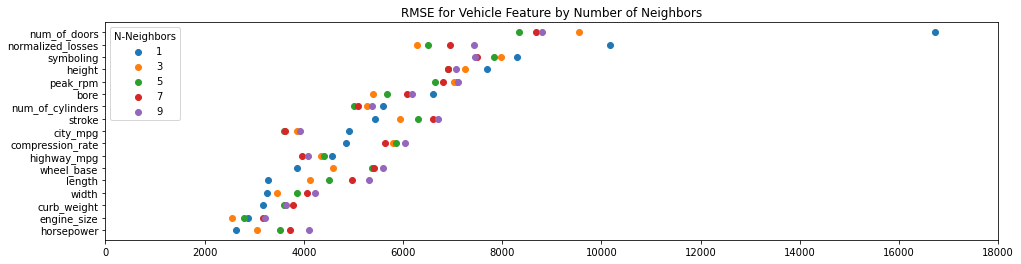

In [30]:
plt.figure(figsize = (16,4))

for k in k_vals:
    df = knn_mses_k_df[knn_mses_k_df.index == k]
    
    plt.scatter([df['rmse']], df['target'], label = k)
    #plt.title('rmse - number of neighbors: {}'.format(k))
    plt.xlim([0,18000])

plt.title('RMSE for Vehicle Feature by Number of Neighbors') 
plt.legend(title = 'N-Neighbors', loc = 'best')
plt.show()

The above does impart some useful information, we can see a general trend for our features regardless of the number of neighbors, but let's break each chart apart so that we can more easily see how these behave at each k.

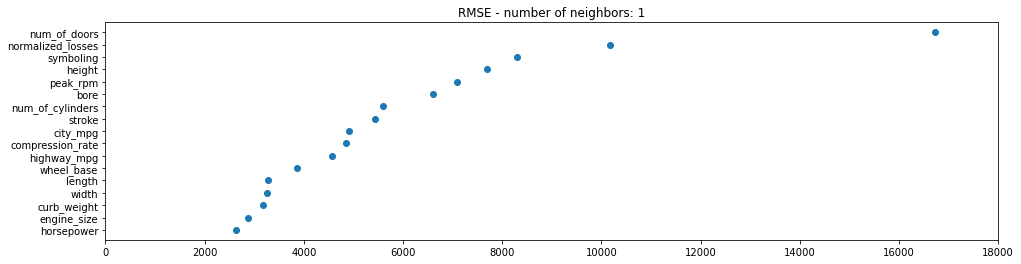

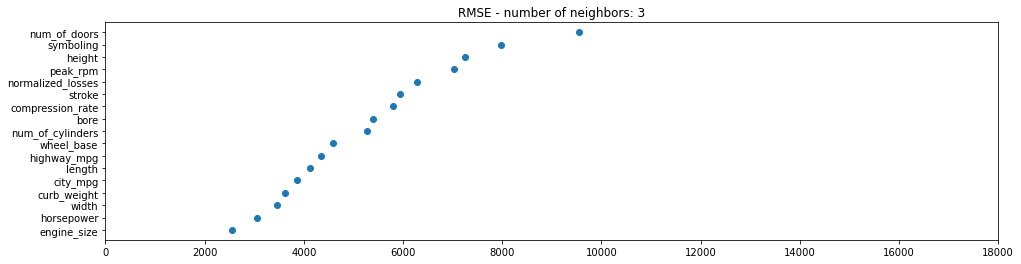

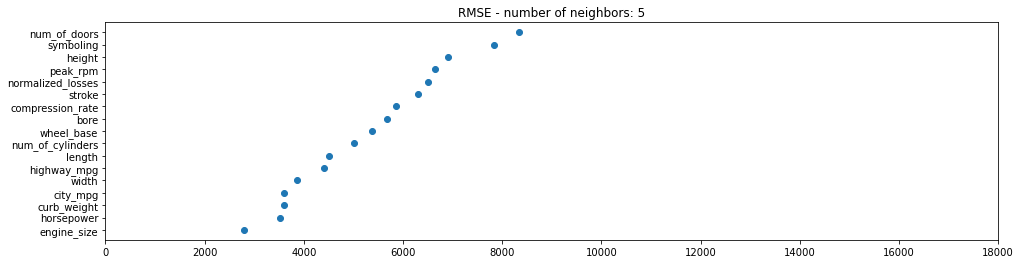

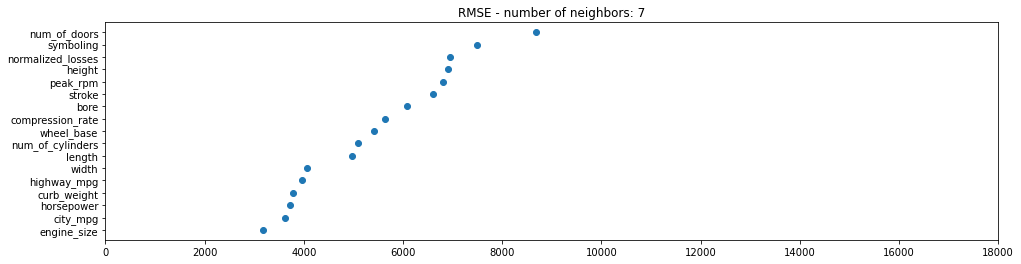

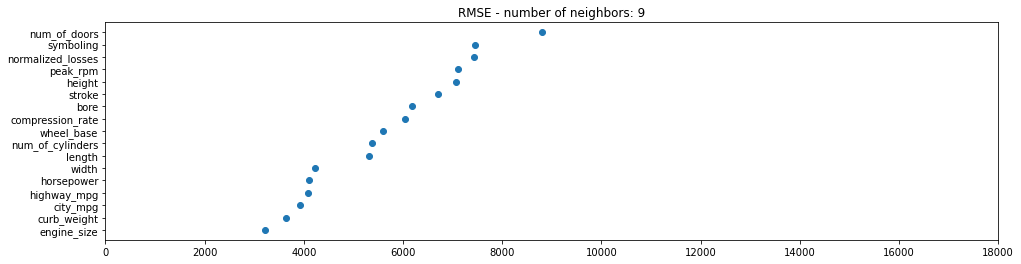

In [31]:
for k in k_vals:
    df = knn_mses_k_df[knn_mses_k_df.index == k]
    
    plt.figure(figsize = (16,4))
    plt.scatter([df['rmse']], df['target'])
    plt.title('RMSE - number of neighbors: {}'.format(k))
    plt.xlim([0,18000])
    
    plt.show()

As the number of neighbors increases, we can see that a cluster of 6 features are consistently the highest performing.

The model with the lowest RMSE is one that takes into account the `engine_size` feature and 5 neighbors. 

### Multivariate Model
Let's now create a multivariate model that can consider many features at once. To do this, we will just need to modify our existing function.

In [32]:
# we've simply changed our function to expect a list instead of a single variable
def knn_train_test(feature_list, target_col, df, neighbors):
    # split df into 80/20
    train_len = round(len(df)*.8)
    test_len = len(df) - train_len
    
    train_df = df[0:train_len] 
    test_df = df[test_len:]
    
    # begin creating model
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    
    train_features = train_df[feature_list]
    train_target = train_df[target_col]
    
    knn.fit(train_features, train_target)
    
    predictions = knn.predict(test_df[feature_list])
    
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

Now we will perform a test for varying levels of feature inclusion to see how this impacts rmse. We will use the default value of k-neighbors, being 5, and use the best performing features at that level.

In [33]:
# isolate the k = 5 in order of best performing rmse
best_knn_5 = knn_mses_k_df[knn_mses_k_df.index == 5]['target']
best_knn_5.head()

k
5    engine_size
5     horsepower
5    curb_weight
5       city_mpg
5          width
Name: target, dtype: object

In [34]:
for i in range(4):
    num_features = i + 2
    feature_list = list(best_knn_5)[:num_features]
    
    mse, rmse = knn_train_test(feature_list, 'price', cars_rand, neighbors = 5)
    
    print('feature count:', num_features,'\n', 'features:', feature_list,'\n', 'rmse:', round(rmse,2),'\n')

feature count: 2 
 features: ['engine_size', 'horsepower'] 
 rmse: 2597.02 

feature count: 3 
 features: ['engine_size', 'horsepower', 'curb_weight'] 
 rmse: 2889.9 

feature count: 4 
 features: ['engine_size', 'horsepower', 'curb_weight', 'city_mpg'] 
 rmse: 2821.92 

feature count: 5 
 features: ['engine_size', 'horsepower', 'curb_weight', 'city_mpg', 'width'] 
 rmse: 2700.36 



We see that as we increase the number of features used, we actually see a descrease in the performance of the model.

Let's now vary the hyperparameter to see if this affects our model's performance.

In [35]:
rmse_dict = {}

for i in range(4):
    num_features = i + 2
    feature_list = list(best_knn_5)[:num_features]
    
    rmse_at_k = {}
    for i in range(24):
        k = i + 1
        mse, rmse = knn_train_test(feature_list, 'price', cars_rand, neighbors = k)
        #print('Neighbors:',k,'\n''feature count:', num_features,'\n', 'features:', feature_list,'\n', 'rmse:', round(rmse,2),'\n')
        rmse_at_k[k] = rmse
    
    rmse_dict[num_features] = rmse_at_k


In [36]:
rmse_at_k_df = pd.DataFrame.from_dict(rmse_dict)

rmse_at_k_df

,2,3,4,5
1,2792.774343,1822.953651,1745.207957,2051.935741
2,2184.820250,1990.070680,1987.530975,1997.641958
3,2371.799147,2424.754158,2320.450749,2170.562946
4,2459.741580,2699.999893,2573.415631,2479.795116
5,2597.020346,2889.901973,2821.921869,2700.361949
6,2723.591047,2919.166201,2763.808933,2987.231639
7,2843.617257,2963.180545,2923.161268,3102.469753
8,2984.708232,3103.787307,3057.423800,3095.019456
9,3111.805175,3189.928264,3186.333745,3192.351028
10,3221.874785,3325.592947,3296.363950,3262.420585


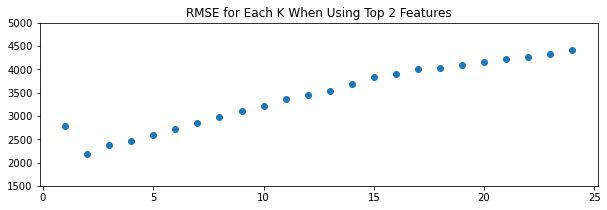

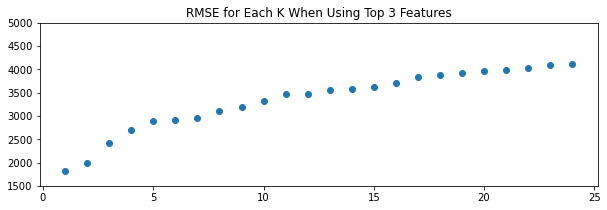

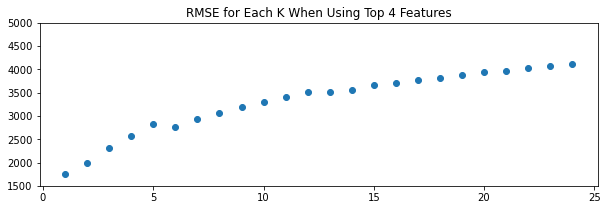

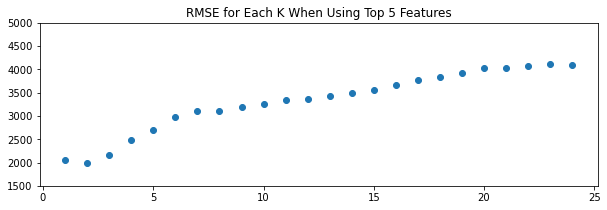

In [37]:
for k in list(rmse_at_k_df.columns):
    plt.figure(figsize = (10,3))
    plt.scatter(rmse_at_k_df.index,rmse_at_k_df[k])
    plt.title('RMSE for Each K When Using Top {} Features'.format(k))
    plt.ylim([1500,5000])
    plt.show()

Interestingly, increasing k does not result in a better performing model. Our best performing model so far is when the top 4 features are used with only a hyperparameter of 1.

### Cross Validation with K-Fold
One way to make sure that our results are not a result of a sampling abberation is to use cross validation. Up to this point we've been using holdout validation, which takes 80% of our data for training and 20% for testing; now we will use k-fold, another, more thorough form of holdout validation. The steps we will take are as follows:
1. Split the dataset into k equal partitions
2. Define the training set as k-1 and the test set as the remaining 1
3. Train the model on the training set
4. Use the model to predict and calculate rmse
5. Repeat k-1 times until each partition has been used 
6. Calculate the mean error for each k across each fold

Typically, 5 or 10 folds are used. Due to the size of our dataset, we will use 5 since 10 folds will result in too small of partitions and high variance. 

Sci-kit has k-fold functionality built in already, so we will just need to modify our existing function.

In [38]:
from sklearn.model_selection import cross_val_score, KFold

In [39]:
# we've simply changed our function to expect a list instead of a single variable
def knn_train_test(feature_list, target_col, df, neighbors, folds):
    # define the number of partitions/folds
    kf = KFold(folds, shuffle=True, random_state=1)
    
    # begin creating model
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    
    #knn.fit(train_features, train_target)
    # cross_val_score stands in for knn.fit
    
    mses = cross_val_score(knn, df[feature_list], df[target_col], scoring = 'neg_mean_squared_error', cv = kf)
    
    avg_rmse = np.average(np.sqrt(np.absolute(mses)))
    return avg_rmse

Let's repeat the multivariate test we did with k-fold to see how they compare

In [40]:
for i in range(4):
    num_features = i + 2
    feature_list = list(best_knn_5)[:num_features]
    
    avg_rmse = knn_train_test(feature_list, 'price', cars_rand, neighbors = 5, folds = 10)
    
    print('feature count:', num_features,'\n', 'features:', feature_list,'\n', 'rmse:', round(avg_rmse,2),'\n')

feature count: 2 
 features: ['engine_size', 'horsepower'] 
 rmse: 2703.6 

feature count: 3 
 features: ['engine_size', 'horsepower', 'curb_weight'] 
 rmse: 3161.9 

feature count: 4 
 features: ['engine_size', 'horsepower', 'curb_weight', 'city_mpg'] 
 rmse: 2806.29 

feature count: 5 
 features: ['engine_size', 'horsepower', 'curb_weight', 'city_mpg', 'width'] 
 rmse: 2979.31 



In [41]:
rmse_dict = {}

for i in range(4):
    num_features = i + 2
    feature_list = list(best_knn_5)[:num_features]
    
    rmse_at_k = {}
    for i in range(24):
        k = i + 1
        avg_rmse = knn_train_test(feature_list, 'price', cars_rand, neighbors = k, folds = 10)
        #print('Neighbors:',k,'\n''feature count:', num_features,'\n', 'features:', feature_list,'\n', 'rmse:', round(rmse,2),'\n')
        rmse_at_k[k] = avg_rmse
    
    rmse_dict[num_features] = rmse_at_k

In [42]:
rmse_at_k_df = pd.DataFrame.from_dict(rmse_dict)

rmse_at_k_df

,2,3,4,5
1,2805.946914,2630.771956,2592.983811,2753.827230
2,2684.097642,2683.938940,2426.219652,2646.080921
3,2797.838914,2803.598476,2562.538041,2661.797321
4,2826.961555,2787.449134,2636.194171,2784.002863
5,2703.604395,3161.898285,2806.286584,2979.314949
6,2866.741525,3110.516338,2940.139793,3149.106977
7,2999.907418,3125.557963,3052.230445,3234.107233
8,3122.952028,3223.198787,3162.265951,3277.001055
9,3155.633163,3322.692788,3215.239755,3357.745322
10,3214.895278,3424.173704,3417.720259,3412.149860


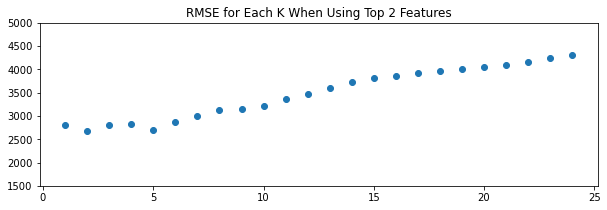

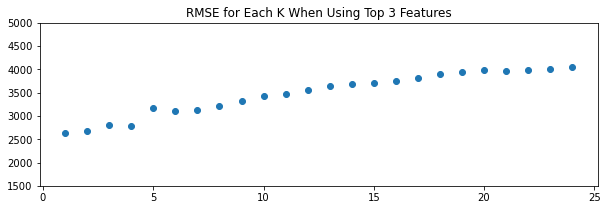

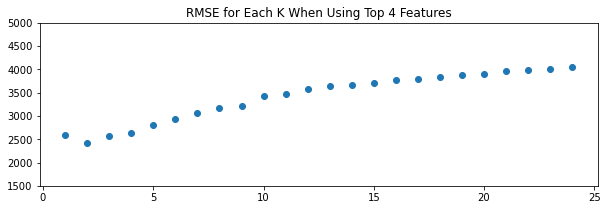

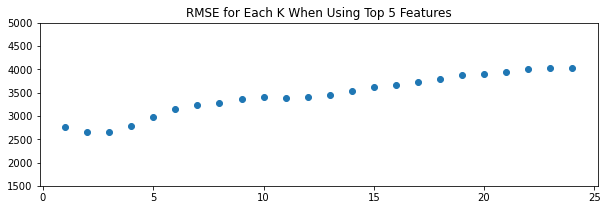

In [43]:
for k in list(rmse_at_k_df.columns):
    plt.figure(figsize = (10,3))
    plt.scatter(rmse_at_k_df.index,rmse_at_k_df[k])
    plt.title('RMSE for Each K When Using Top {} Features'.format(k))
    plt.ylim([1500,5000])
    plt.show()

We can see that creating folds increased our rmse. 